In [2]:
pip insatll numpy

Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "insatll" - maybe you meant "install"



## *loading required libraries*

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sms
sns.set_theme()
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer, LabelEncoder


### *Loading the raw data*

In [4]:
raw_data= pd.read_csv('1.04.+Real-life+example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### *PreProcessing*

In [5]:
raw_data.describe(include='all') #descriptive analyis of data, if we remove the colomn-Model(not much effect, since it can be obtained from: brand, year, engineV)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [6]:
#dropping the (model) colomn, from the raw_data dataframe

data=raw_data.drop(['Model'], axis=1)
data.describe(include='all')

#we can analyse the price and EngineV column has some missing values

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### *dealing with the missing values*

In [7]:
data.isnull().sum() #True-> misssing value, False-> not a missing value

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [8]:
data_no_mv= data.dropna(axis=0) #will remove all missing values along with keeping the original data inact
data_no_mv.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [9]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


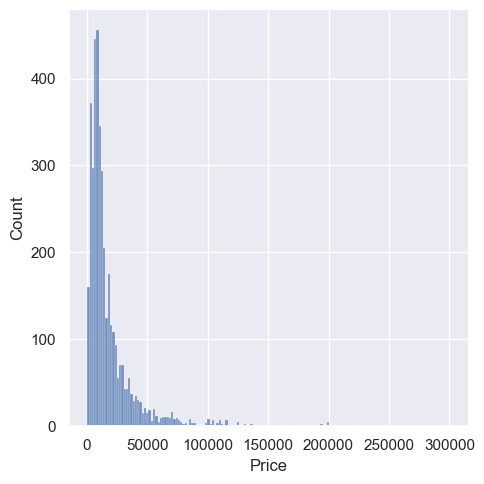

In [10]:
sns.displot(data_no_mv['Price'])

In [11]:
#dealing with outliers(the extremisst data points)
q= data_no_mv['Price'].quantile(0.99) #99th percentile ek threshold hai, jiske upar sb outliers hai
data_1= data_no_mv[data_no_mv['Price']<q] #only those colomns where price is les than the 99th percentile
data_1.describe(include='all') 

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


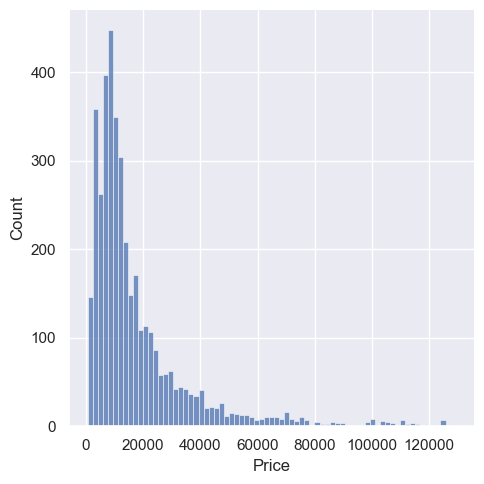

In [12]:
sns.displot(data_1['Price'])

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


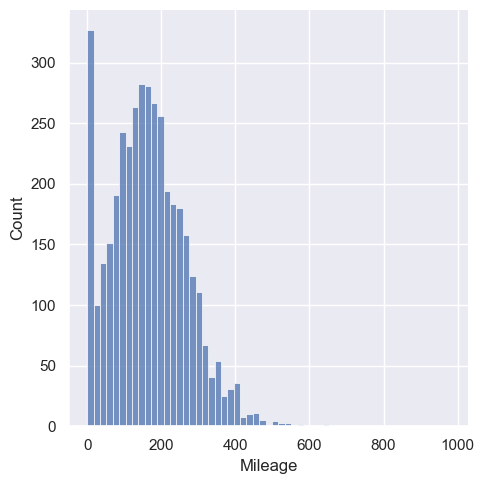

In [13]:
sns.displot(data_1['Mileage'])

In [14]:
q=data_1['Mileage'].quantile(0.99)
data_2=data_1[data_1['Mileage']<q]

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


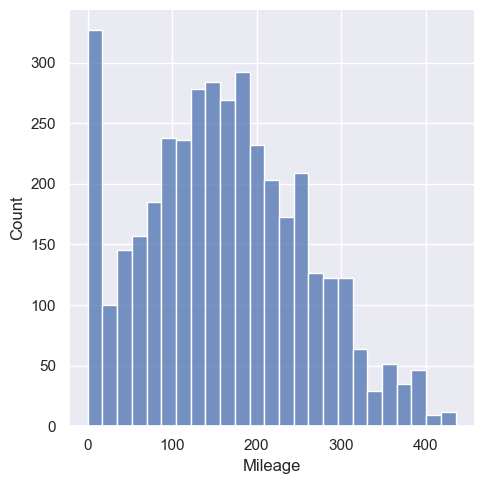

In [15]:
sns.displot(data_2['Mileage'])

## *before applying percentile transformer*

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


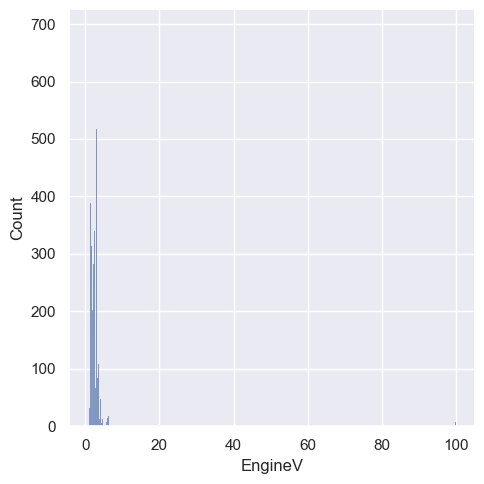

In [16]:
sns.displot(data_no_mv['EngineV'])

## *after applying percentile transformer*

In [17]:
q=data_2['EngineV'].quantile(0.99)
data_3=data_2[data_2['EngineV']<q]

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


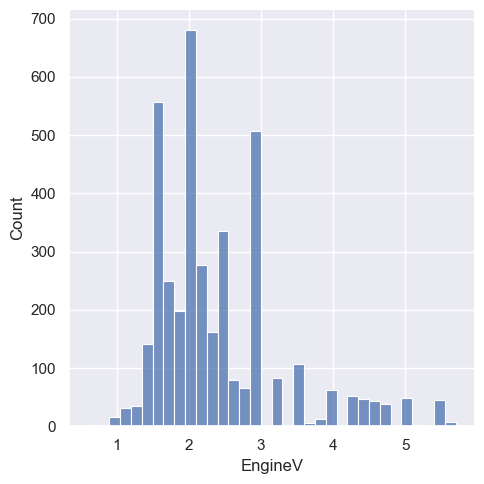

In [18]:
sns.displot(data_3['EngineV'])

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


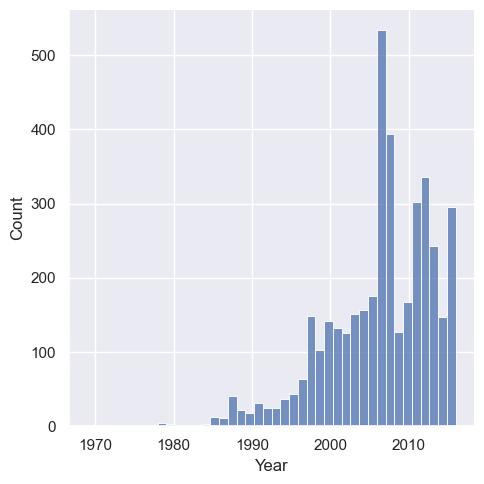

In [19]:
sns.displot(data_no_mv['Year'])

In [20]:
q=data_3['Year'].quantile(0.01)
data_4= data_3[data_3['Year']>q]


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


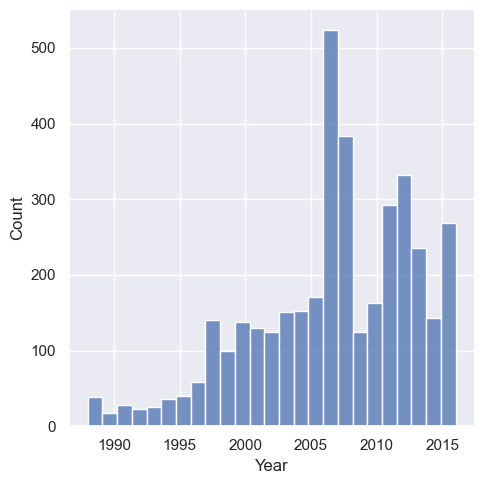

In [21]:
sns.displot(data_4['Year'])

In [22]:
data_cleaned=data_4.reset_index(drop=True)

In [23]:
data_cleaned.describe(include='all') #around 250 useless informationis deleetd as of now

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3840,3840.000000,3840,3840.000000,3840.000000,3840,3840,3840.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1451,NaN,NaN,1806,3478,NaN
mean,NaN,18028.973987,NaN,160.860156,2.424310,NaN,NaN,2006.702865
std,NaN,18963.887320,NaN,95.742943,0.899824,NaN,NaN,6.117627
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11525.000000,NaN,157.500000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.000000,NaN,226.000000,3.000000,NaN,NaN,2012.000000


## *checking the ols(Ordinary Least Sqaures) assumptions*

Text(0.5, 1.0, 'Mileage V/S Price')

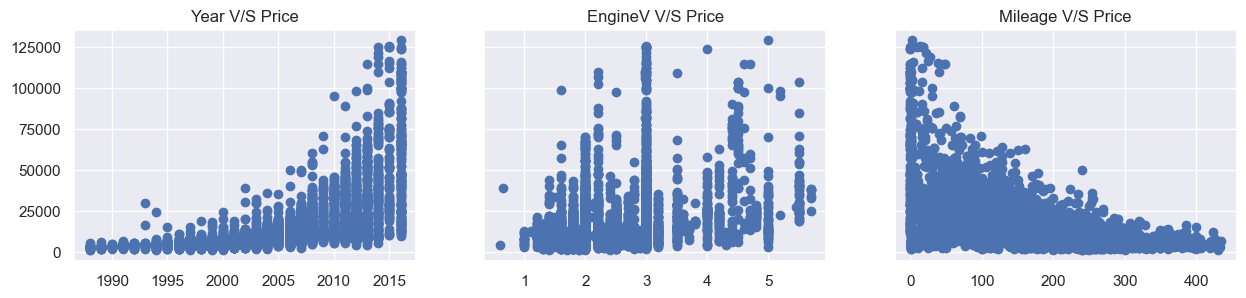

In [24]:
f, (ax1, ax2, ax3)= plt.subplots(1, 3, sharey=True, figsize=(15, 3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Year V/S Price')

ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('EngineV V/S Price')

ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Mileage V/S Price')

# this was not suitable as the graph we observed were not linear function as expected form, linear regeression

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


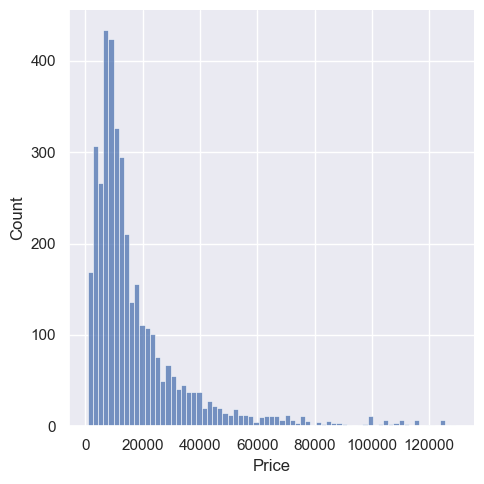

In [25]:
sns.displot(data_cleaned['Price'])

## *realxing out the assumptions*

In [26]:
#created a new column named, log_price inn order to get linear function from the graph

log_price= np.log(data_cleaned['Price'])
data_cleaned['logPRICE']=log_price
data_cleaned


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,logPRICE
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3835,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3836,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3837,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3838,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


Text(0.5, 1.0, 'Mileage V/S logPRICE')

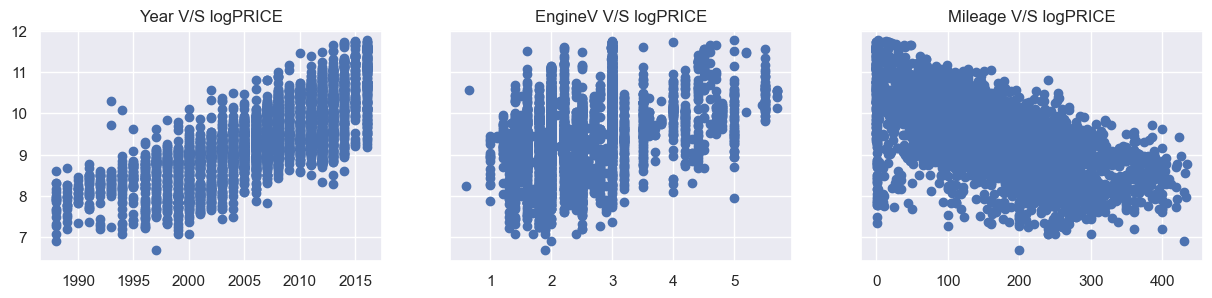

In [27]:
f, (ax1, ax2, ax3)= plt.subplots(1, 3, sharey=True, figsize=(15, 3))
ax1.scatter(data_cleaned['Year'], data_cleaned['logPRICE'])
ax1.set_title('Year V/S logPRICE')

ax2.scatter(data_cleaned['EngineV'], data_cleaned['logPRICE'])
ax2.set_title('EngineV V/S logPRICE')

ax3.scatter(data_cleaned['Mileage'], data_cleaned['logPRICE'])
ax3.set_title('Mileage V/S logPRICE')

In [28]:
data_cleaned=data_cleaned.drop(['Price'], axis=1)

## *multi-collinearity* (we will be having some degree of collinearity since, year-mileage are related to each other)

*sk-learn, doesn't check this, so we need to switch to stats models: VIF(variance inflation factor)*

In [29]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'logPRICE'], dtype=object)

In [30]:
#Write Python code to check for multicollinearity among variables using the Variance Inflation Factor (VIF) method
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data_cleaned[['Mileage', 'EngineV', 'Year']] #jin variables pe hme , colinearity check krni hai
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features']= variables.columns

In [31]:
vif
# vif-value:
#     0->totally fine
#     1<vif<5: perfectly okay
#     5<vif: unacceptable

,VIF,features
0,3.798257,Mileage
1,8.262153,EngineV
2,10.823028,Year


In [32]:
data_wo_collinearity=  data_cleaned.drop(['Year'], axis=1)
data_wo_collinearity.describe(include='all')

,Brand,Body,Mileage,EngineV,Engine Type,Registration,logPRICE
count,3840,3840,3840.000000,3840.000000,3840,3840,3840.000000
unique,7,6,NaN,NaN,4,2,NaN
top,Volkswagen,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,1451,NaN,NaN,1806,3478,NaN
mean,NaN,NaN,160.860156,2.424310,NaN,NaN,9.408321
std,NaN,NaN,95.742943,0.899824,NaN,NaN,0.873615
min,NaN,NaN,0.000000,0.600000,NaN,NaN,6.684612
25%,NaN,NaN,92.000000,1.800000,NaN,NaN,8.881836
50%,NaN,NaN,157.500000,2.200000,NaN,NaN,9.352272
75%,NaN,NaN,226.000000,3.000000,NaN,NaN,9.975808


## *now its time for creating some dummy variables*

In [87]:
data_including_dummyVar= pd.get_dummies(data_wo_collinearity, drop_first=True)
#data_including_dummyVar = data_including_dummyVar.astype(int)

In [88]:
data_including_dummyVar.head()

,Mileage,EngineV,logPRICE,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


In [52]:
data_including_dummyVar.columns.values

array(['Mileage', 'EngineV', 'logPRICE', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [56]:
cols=['logPRICE', 'Mileage', 'EngineV', 'Brand_BMW',
    'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
    'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
    'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
    'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [89]:
data_preprocessed= data_including_dummyVar[cols]
data_preprocessed.head()


,logPRICE,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.974618,427,2.9,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.495519,358,5.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.043249,240,4.2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.814656,120,2.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


## *homework stuff*

In [58]:
#exercise-01
# 1.-->Calculate the variance inflation factors for all variables contained in data_preprocessed. Anything strange?

variables=data_preprocessed
vif=pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

#high valye of logPRICE indicates that our model till now is perfect as it is a dependent variable(value to be predicted, so it should be dependent on other variables!!)

,VIF,features
0,37.278354,logPRICE
1,4.395038,Mileage
2,10.011172,EngineV
3,2.617994,Brand_BMW
4,3.028007,Brand_Mercedes-Benz
5,1.819186,Brand_Mitsubishi
6,2.298384,Brand_Renault
7,2.420224,Brand_Toyota
8,3.333622,Brand_Volkswagen
9,1.607988,Body_hatch


In [61]:
#exercise-02: calculate the variance inflation factor (VIF) of all variables including the dummies (but without the dependent variable)

test_data= data_preprocessed.drop('logPRICE', axis=1)


variables=test_data
vif=pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

,VIF,features
0,4.394927,Mileage
1,6.328376,EngineV
2,2.353307,Brand_BMW
3,2.811146,Brand_Mercedes-Benz
4,1.645764,Brand_Mitsubishi
5,2.092622,Brand_Renault
6,2.156374,Brand_Toyota
7,2.840085,Brand_Volkswagen
8,1.487356,Body_hatch
9,1.535600,Body_other


In [69]:
#exercide-03: Now calculate the VIFs for a data frame where we include the dummies, without 'log_price', but DO NOT DROP THE FIRST DUMMY. Anything strange now?

data_including_dummyVar_test= pd.get_dummies(data_wo_collinearity, drop_first=True)
data_including_dummyVar_test = data_including_dummyVar_test.astype(int)



variables=data_including_dummyVar_test.drop(['logPRICE'], axis=1)
vif=pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

,VIF,features
0,4.394927,Mileage
1,6.328376,EngineV
2,2.353307,Brand_BMW
3,2.811146,Brand_Mercedes-Benz
4,1.645764,Brand_Mitsubishi
5,2.092622,Brand_Renault
6,2.156374,Brand_Toyota
7,2.840085,Brand_Volkswagen
8,1.487356,Body_hatch
9,1.535600,Body_other


## *_Linear Regression Model_*

1. ### *setting up the input and output variables*

In [90]:
val_tobe_predicted= data_preprocessed['logPRICE']
predictors= data_preprocessed.drop(['logPRICE'], axis=1)


2. ### *scaling the data*

In [91]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
scaler.fit(predictors)

StandardScaler()

In [92]:
input_scaled= scaler.transform(predictors)

## now the main part: splitting the data into train, test

In [93]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(input_scaled, val_tobe_predicted, test_size=0.2, random_state=365)

### *creating regression*

In [94]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [95]:
y_hat=reg.predict(x_train)

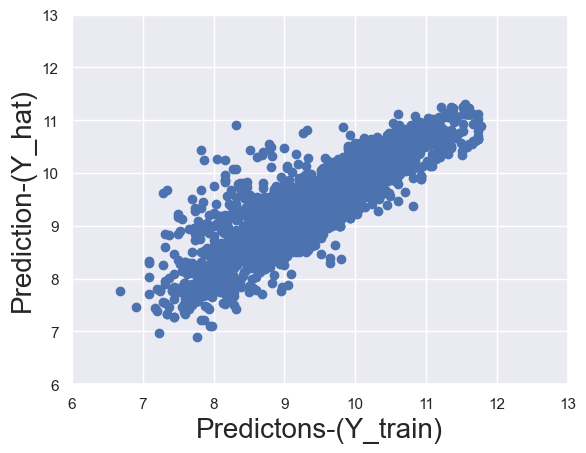

In [98]:
plt.scatter(y_train, y_hat)
plt.ylabel('Prediction-(Y_hat)', fontsize=20)
plt.xlabel('Target-(Y_train)', fontsize=20)
plt.xlim(6, 13)
plt.ylim(6, 13)
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'RESIDUALS PDF')

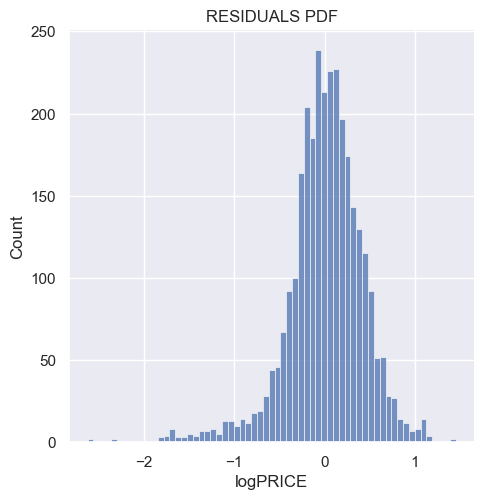

In [99]:
#residuals= difference between targets and predictions

sns.displot(y_train - y_hat)
plt.title('RESIDUALS PDF')


In [100]:
reg.score(x_train, y_train) #our model accepts 75% variablity of data

0.7530909994619517

## *_weights and biasis_*

In [101]:
reg.intercept_

9.40624015974228

In [102]:
reg.coef_

array([-0.46208995,  0.20783939,  0.02796076,  0.02181996, -0.13396688,
       -0.17590569, -0.05228283, -0.0833789 , -0.15189951, -0.10228949,
       -0.18570147, -0.12102094, -0.15973313, -0.12825029, -0.03177898,
       -0.15309642,  0.31756163])

In [104]:
reg_summary=pd.DataFrame(predictors.columns.values, columns=['FEATUES'])
reg_summary['Weights']=reg.coef_
reg_summary

#a positive weight shows that a feature increases in value so tha logPRICE does and vice-versa

,FEATUES,Weights
0,Mileage,-0.462090
1,EngineV,0.207839
2,Brand_BMW,0.027961
3,Brand_Mercedes-Benz,0.021820
4,Brand_Mitsubishi,-0.133967
5,Brand_Renault,-0.175906
6,Brand_Toyota,-0.052283
7,Brand_Volkswagen,-0.083379
8,Body_hatch,-0.151900
9,Body_other,-0.102289


In [105]:
data_cleaned['Brand'].unique()

#in the brand column if the weight is positivee it can be said that it is more expensive than AUDI which i sthe benchmark

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

## *TESTING MODEL*

In [106]:
y_hat_test= reg.predict(x_test)

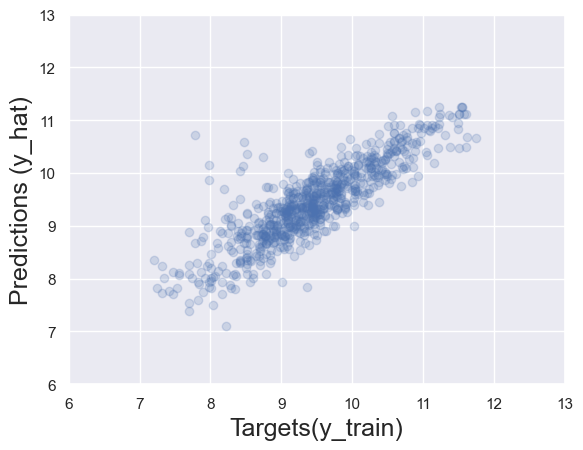

In [108]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets(y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.xlim(6, 13)
plt.ylim(6, 13)
plt.show()



In [109]:
df_perf= pd.DataFrame(y_hat_test, columns=['Predictions'])
df_perf.head()

,Predictions
0,9.650912
1,7.936185
2,9.338312
3,9.834089
4,9.385427


In [121]:
df_perf['Target']= np.exp(y_test)
df_perf


,Predictions,Target,Residual,Differences
0,9.650912,8800.0,8790.349088,99.890331
1,7.936185,5200.0,5192.063815,99.847381
2,9.338312,18100.0,18090.661688,99.948407
3,9.834089,15700.0,15690.165911,99.937362
4,9.385427,9600.0,9590.614573,99.902235
...,...,...,...,...
763,8.928271,4950.0,4941.071729,99.819631
764,9.730310,16000.0,15990.269690,99.939186
765,8.086401,5400.0,5391.913599,99.850252
766,8.074539,4100.0,4091.925461,99.803060


In [122]:
y_test= y_test.reset_index(drop=True)
y_test.head()

0    9.082507
1    8.556414
2    9.803667
3    9.661416
4    9.169518
Name: logPRICE, dtype: float64

In [127]:
df_perf['Target']= np.exp(y_test)
df_perf

,Predictions,Target,Residual,Differences
0,9.650912,8800.0,8790.349088,99.890331
1,7.936185,5200.0,5192.063815,99.847381
2,9.338312,18100.0,18090.661688,99.948407
3,9.834089,15700.0,15690.165911,99.937362
4,9.385427,9600.0,9590.614573,99.902235
...,...,...,...,...
763,8.928271,4950.0,4941.071729,99.819631
764,9.730310,16000.0,15990.269690,99.939186
765,8.086401,5400.0,5391.913599,99.850252
766,8.074539,4100.0,4091.925461,99.803060


In [128]:
df_perf['Residual']=df_perf['Target']-df_perf['Predictions']
df_perf

,Predictions,Target,Residual,Differences
0,9.650912,8800.0,8790.349088,99.890331
1,7.936185,5200.0,5192.063815,99.847381
2,9.338312,18100.0,18090.661688,99.948407
3,9.834089,15700.0,15690.165911,99.937362
4,9.385427,9600.0,9590.614573,99.902235
...,...,...,...,...
763,8.928271,4950.0,4941.071729,99.819631
764,9.730310,16000.0,15990.269690,99.939186
765,8.086401,5400.0,5391.913599,99.850252
766,8.074539,4100.0,4091.925461,99.803060


In [129]:
df_perf['Differences']= np.absolute(df_perf['Residual']/df_perf['Target']*100)
df_perf

,Predictions,Target,Residual,Differences
0,9.650912,8800.0,8790.349088,99.890331
1,7.936185,5200.0,5192.063815,99.847381
2,9.338312,18100.0,18090.661688,99.948407
3,9.834089,15700.0,15690.165911,99.937362
4,9.385427,9600.0,9590.614573,99.902235
...,...,...,...,...
763,8.928271,4950.0,4941.071729,99.819631
764,9.730310,16000.0,15990.269690,99.939186
765,8.086401,5400.0,5391.913599,99.850252
766,8.074539,4100.0,4091.925461,99.803060


In [130]:
df_perf.describe()

,Predictions,Target,Residual,Differences
count,768.000000,768.000000,768.000000,768.000000
mean,9.432473,18297.171302,18287.738829,99.900111
std,0.747732,18743.891850,18743.334821,0.084719
min,7.103801,1350.000000,1341.653225,99.381720
25%,8.942879,7300.000000,7291.280854,99.878435
50%,9.398912,12350.000000,12340.827094,99.923362
75%,9.932166,20814.787500,20804.601481,99.953368
max,11.252107,126000.000000,125989.333902,99.991535


In [132]:
df_perf.sort_values(by=['Differences'])

,Predictions,Target,Residual,Differences
501,8.346775,1350.0,1341.653225,99.381720
10,7.815410,1400.0,1392.184590,99.441756
733,8.248536,1500.0,1491.751464,99.450098
555,8.016385,1550.0,1541.983615,99.482814
480,7.736233,1499.0,1491.263767,99.483907
...,...,...,...,...
24,10.467790,99999.0,99988.532210,99.989532
492,11.111854,109999.0,109987.888146,99.989898
614,10.494896,109999.0,109988.505104,99.990459
161,10.676871,112000.0,111989.323129,99.990467
